In [1]:
import torch
# 넘파이 버전 : 1.24 보다 작아야 한다 , 토치 버전 : 2.1.1+cu118
# 넘파이 버전 1.23.5
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(np.__version__)
print(torch.__version__)

1.23.5
2.1.1+cpu


In [3]:
# 학습에 사용할 데이터 생성
X_train=np.arange(10, dtype='float32')
print(X_train, X_train.dtype, X_train.shape, X_train.ndim)
X_train=np.arange(10, dtype='float32').reshape([10,1])
print(X_train, X_train.dtype, X_train.shape, X_train.ndim)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] float32 (10,) 1
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]] float32 (10, 1) 2


In [4]:
# 레이블 생성
y_train=np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0], dtype='float32')
print(y_train.dtype)

float32


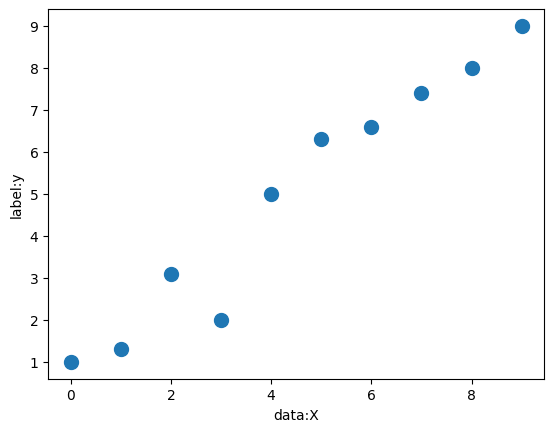

In [5]:
# 시각화 
plt.plot(
    X_train,
    y_train,
    'o',
    markersize=10
)
plt.xlabel('data:X')
plt.ylabel('label:y')
plt.show()

In [ ]:
# 1. 데이터 정규화 진행 : StandardScaler, 코드 진행
# 2. Dataset : data + label 
# 3. DataLoader : 1개씩 모델에 들어가게 해야 한다
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# 데이터를 정규화 : ndarray
X_train_norm=(X_train-np.mean(X_train))/np.std(X_train) 
# 테이터를 텐서로 변환
X_train_norm=torch.from_numpy(X_train_norm)

# 레이블 텐선 변환
y_train=torch.from_numpy(y_train).float()

# 데이터셋 생성 : 데이터와 레이블 묶은것
trian_ds=TensorDataset(X_train_norm, y_train)

# DataLoader 생성 : 배치사이즈, 셔플
batch_size=1

train_dl=DataLoader(trian_ds, batch_size=batch_size, shuffle=True)


In [ ]:
# 신경망 구성
# 수동으로 신경망 구성
# 가중치 1개 선언 : 임의값으로 초기화
torch.manual_seed(1)
weight=torch.randn(1)
weight.requires_grad_() # 아주 중요, 가중치를 미분가능하게 만든것이다
# 바이어스 1개 선언 : 0으로 초기화
bias=torch.zeros(1, requires_grad=True)

# 오차(손실)함수 정의 : 회귀의 오차함수=> MSE, MAE, RMSE, RMSLE
def loss_fn(input, target): # input : y^, target : real value
    return (input-target).pow(2).mean() # MSE

# 모델 정의
def model(x_batch):
    return x_batch @ weight + bias # 내적의 결과값은 스칼라(단일값) : 유자도 의미


In [8]:
# 학습하는 코딩
# W := W - ^ * ^W
# 학습에 필요한 파라미터 설정
# 학습율 : learning_rate
learning_rate=0.0001
# 에포크 : 전체 데이터 몇번 반복해서 사용할 것인지
num_epochs=1000
# 몇번마다 손실(오차)을 출력한 것이지? 지정
loss_epochs=10

# 학습 : 데이터와 레이블을 넣어서 학습
for epoch in range(num_epochs): # 200반복
    # 데이터 추출(train_dl)해서 모델 넣어야 한다.
    for x_batch, y_batch in train_dl: # x_batch : 데이터, y_batch : 레이블
        pred=model(x_batch)
        loss=loss_fn(pred,y_batch) 
        loss.backward() # 오차 역전파
        
        # 추론 : 뉴데이터 넣어서 예측값을 추출 : 계산그래프X, 가중치값을 저장 X
        with torch.no_grad(): # 가중치 값들을 구하기 => 출력
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
    # 에포크 10의 배수마다 오차를 출력
    if epoch % loss_epochs == 0:
        print(f'에포크 : {epoch}, 손실 :{loss.item():4f}')
        
        

에포크 : 0, 손실 :46.420670
에포크 : 10, 손실 :36.847397
에포크 : 20, 손실 :4.019924
에포크 : 30, 손실 :45.545486
에포크 : 40, 손실 :53.658543
에포크 : 50, 손실 :38.091248
에포크 : 60, 손실 :3.365927
에포크 : 70, 손실 :47.420197
에포크 : 80, 손실 :19.588232
에포크 : 90, 손실 :3.040049
에포크 : 100, 손실 :41.897514
에포크 : 110, 손실 :17.617043
에포크 : 120, 손실 :2.477751
에포크 : 130, 손실 :8.651769
에포크 : 140, 손실 :35.507755
에포크 : 150, 손실 :1.764944
에포크 : 160, 손실 :26.438332
에포크 : 170, 손실 :23.721292
에포크 : 180, 손실 :22.804956
에포크 : 190, 손실 :28.853796
에포크 : 200, 손실 :18.118477
에포크 : 210, 손실 :20.264448
에포크 : 220, 손실 :1.978018
에포크 : 230, 손실 :17.765285
에포크 : 240, 손실 :1.342943
에포크 : 250, 손실 :1.273612
에포크 : 260, 손실 :10.492305
에포크 : 270, 손실 :0.508054
에포크 : 280, 손실 :15.897473
에포크 : 290, 손실 :15.232430
에포크 : 300, 손실 :18.223417
에포크 : 310, 손실 :8.872046
에포크 : 320, 손실 :0.869622
에포크 : 330, 손실 :8.302719
에포크 : 340, 손실 :8.033273
에포크 : 350, 손실 :0.142251
에포크 : 360, 손실 :9.922401
에포크 : 370, 손실 :10.816671
에포크 : 380, 손실 :0.616285
에포크 : 390, 손실 :0.580847
에포크 : 400, 손실 :11.948375
에포크 

In [9]:
# 가중치 값 출력
print(f'최종 파라미터(가중치) : {weight.item()},{bias.item()}')

최종 파라미터(가중치) : 2.430217742919922,4.297636032104492


In [10]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs==0:
        print(f'에포크 {epoch}  손실 {loss.item():.4f}')

에포크 0  손실 45.0782
에포크 10  손실 26.4366
에포크 20  손실 1.5918
에포크 30  손실 14.1307
에포크 40  손실 11.6038
에포크 50  손실 6.3084
에포크 60  손실 0.6349
에포크 70  손실 3.1374
에포크 80  손실 1.9999
에포크 90  손실 0.3133
에포크 100  손실 0.7653
에포크 110  손실 1.0039
에포크 120  손실 0.0235
에포크 130  손실 0.5176
에포크 140  손실 0.0759
에포크 150  손실 1.8789
에포크 160  손실 0.0008
에포크 170  손실 0.0866
에포크 180  손실 0.0646
에포크 190  손실 0.0011


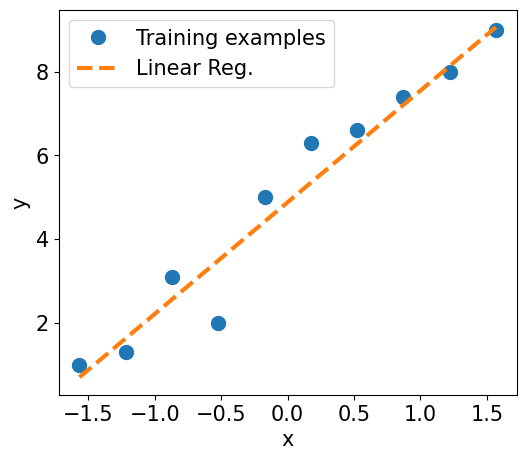

In [11]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()  # 계산 그래프에서 텐서를 분리합니다.


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

#plt.savefig('figures/12_08.pdf')

plt.show()

In [12]:
# nn module 사용해서 신경망 구성 학습
import torch.nn as nn

input_size=1
output_size=1

# 신경망 구성
model=nn.Linear(input_size,output_size)
# 손실 함수 정의
loss_fn=nn.MSELoss(reduction='mean')
# 최적화 : 미분 => 오차 최소가 되는 가중치
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs): # 1000번 반복
    for x_batch, y_batch in train_dl: # 데이터 10개라서 10번 반복
        # 1. 예측값 추출
        pred=model(x_batch)[:,0]
        
        # 2. 오차
        loss=loss_fn(pred, y_batch)
        
        # 3. gradient(기울기 구한것이다) 계산
        loss.backward()
        
        # 4. 가중치 업데이트 : 오차가 최소가 되는 가중치 구한다
        optimizer.step()
        
        # 5. 기울기 초기화 : 빠지면 발산, 폭주할 가능성이 있다
        # 파이토치 기본적으로 기울기 누적 처리
        # 정상 학습이 된다
        # 기울기를 초기화 새로 계산하게 만든다
        optimizer.zero_grad()
    if epoch % loss_epochs==0: # 10배수이면 
        print(f'에포크 : {epoch}, 손실 : {loss.item():.4f}')

에포크 : 0, 손실 : 24.6684
에포크 : 10, 손실 : 29.1377
에포크 : 20, 손실 : 20.9207
에포크 : 30, 손실 : 0.1257
에포크 : 40, 손실 : 12.4922
에포크 : 50, 손실 : 1.7845
에포크 : 60, 손실 : 7.6425
에포크 : 70, 손실 : 2.5606
에포크 : 80, 손실 : 0.0157
에포크 : 90, 손실 : 0.7548
에포크 : 100, 손실 : 0.8412
에포크 : 110, 손실 : 0.4923
에포크 : 120, 손실 : 0.0823
에포크 : 130, 손실 : 0.0794
에포크 : 140, 손실 : 0.0891
에포크 : 150, 손실 : 0.0973
에포크 : 160, 손실 : 0.1043
에포크 : 170, 손실 : 0.1103
에포크 : 180, 손실 : 0.0009
에포크 : 190, 손실 : 0.0764


최종 파라미터: 2.6496422290802 4.87706995010376


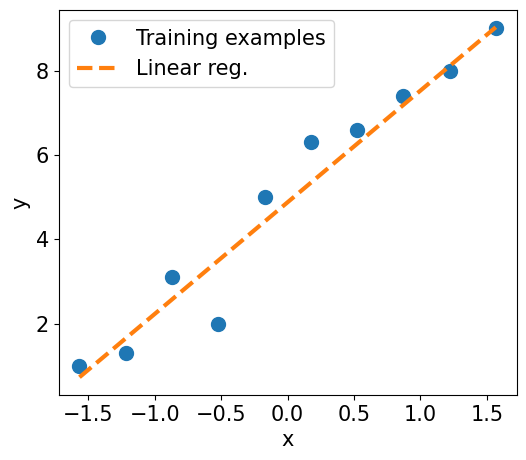

In [13]:
print('최종 파라미터:', model.weight.item(), model.bias.item())

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

#plt.savefig('ch12-linreg-2.pdf')

plt.show()


In [20]:
# 다중 분류 예제 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 로딩=> 데이터와 레이블 분리
iris=load_iris()

X=iris['data']
y=iris['target']

print(type(X), type(y))

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test=\
    train_test_split(
        X,
        y,
        test_size=1./3,
        random_state=1
    )

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [21]:
# 정규화 처리, 데이터셋, 데이터로더 생성 
# 학습할 데이터를 준비
from torch.utils.data import TensorDataset, DataLoader

# 1. 데이터 정규화 : ndarray
X_train_norm=(X_train - np.mean(X_train)) / np.std(X_train)
# data tensor
X_train_norm=torch.from_numpy(X_train_norm).float()
# label tensor
y_train=torch.from_numpy(y_train)

# 2. 데이터셋 생성
train_ds=TensorDataset(X_train_norm, y_train)

# 3. DataLoader 생성
torch.manual_seed(1)
batch_size=2
train_dl=DataLoader(train_ds,batch_size=batch_size, shuffle=True)

In [22]:
# 다층 신경망 구성 : 
# input(4)-> 층(hidden:16) -> sigmoid -> 층(hidden:16) -> output(3) ->  softmax
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size): # 층 정의
        super().__init__() # 상위 클래스(Module)를 객체 생성, 초기화
        # 첫번째 층 : 입력개수(input_size), 유닛개수(hidden_size)
        self.layer1=nn.Linear(input_size, hidden_size)
        self.layer2=nn.Linear(hidden_size, output_size)
    # def forward(self, x): # x : 데이터
    def forward(self, x): # x : 데이터
        # x : 층을 통과한 결과값 = self.layer1(x : 입력데이터)   
        x=self.layer1(x)  # 선형(직선)
        x=nn.Sigmoid()(x) # x값이 0~1 값으로 변경된다, 곡선(비선형)
        x=self.layer2(x) # output_size=3 개 나온다
        # 위 나온 값을 확률로 변환
        x=nn.Softmax(dim=1)(x)
        return x
        

In [23]:
# 피처(열)의 개수
input_size=X_train_norm.shape[1]
# 유닛의 개수
hidden_size=16 # 2**4
# 결과값의 개수 : 3개 품종 분류
output_size=3

# Model object 생성만 한것이다
model=Model(input_size, hidden_size, output_size)

# 학습률 설정
learning_rate=0.001

# 손실함수 object 정의 : 다중 분류
loss_fn=nn.CrossEntropyLoss()

# 미분(오차역전파) 정의
# model.parameters() : W
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)



In [24]:
# 학습 결과 : 에포크별로 오차, 정확도 저장 => 시각화
num_epochs=500
# 오차 100개 저장 리스트
loss_hist=[0] * num_epochs
# 정확도 100개 저장 리스트
accuracy_hist=[0] * num_epochs

for epoch in range(num_epochs): # 100번 반복
    for x_batch, y_batch in train_dl: # 50번 반복 => 전체데이터 : 100, batch_size:2
        # 예측값
        pred=model(x_batch) # forward() 실행
        loss=loss_fn(pred,y_batch.long())
        loss.backward()
        optimizer.step() # cost min W
        optimizer.zero_grad() # 기울기 초기화
        
        # 에포크별 오차 리스트에 추가
        # 배치별 오차 누적
        loss_hist[epoch] += loss.item()*y_batch.size(0) # 2곱한것
        # 배치별 정확도 누적
        is_correct=(torch.argmax(pred,dim=1)==y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
    
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)


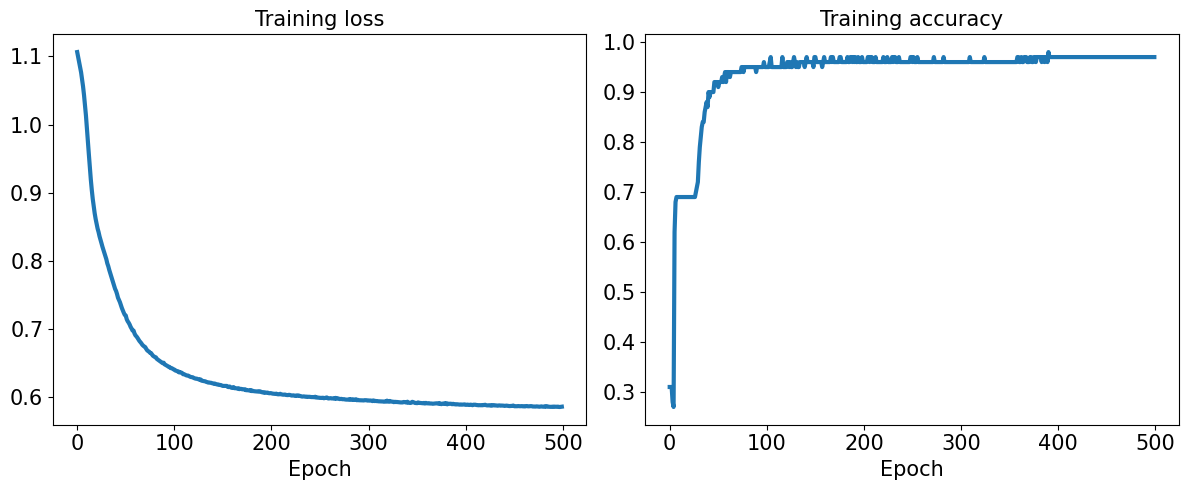

In [25]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')

plt.show()

In [26]:
# 모델 평가 : 테스트 데이터 => X_test, y_test <= ndarray
# 데이터 정규화
X_test_norm=(X_test  - np.mean(X_train)) / np.std(X_train)
# 텐서 변환
X_test_norm_ts=torch.from_numpy(X_test_norm).float()
y_test_ts=torch.from_numpy(y_test)

# 예측값 추출 : model(X_test_norm)
pred_test=model(X_test_norm_ts)

In [27]:
pred_test

tensor([[9.9999e-01, 6.1246e-06, 2.9992e-12],
        [7.0910e-04, 9.9928e-01, 6.4541e-06],
        [1.4405e-06, 9.9839e-01, 1.6040e-03],
        [9.9999e-01, 6.4541e-06, 3.2834e-12],
        [5.8904e-17, 1.8205e-05, 9.9998e-01],
        [1.2387e-07, 9.5761e-01, 4.2393e-02],
        [5.8130e-13, 5.5303e-03, 9.9447e-01],
        [9.9999e-01, 1.0888e-05, 6.3215e-12],
        [9.9999e-01, 1.0203e-05, 5.6351e-12],
        [5.3603e-17, 3.3422e-05, 9.9997e-01],
        [5.0548e-07, 9.9782e-01, 2.1839e-03],
        [9.9999e-01, 8.2927e-06, 4.4960e-12],
        [1.0778e-17, 1.5943e-05, 9.9998e-01],
        [7.3371e-07, 9.9527e-01, 4.7276e-03],
        [9.4449e-08, 9.7700e-01, 2.3004e-02],
        [9.9999e-01, 7.3441e-06, 3.8853e-12],
        [2.8231e-06, 9.9967e-01, 3.2437e-04],
        [6.9791e-08, 9.6611e-01, 3.3886e-02],
        [9.9999e-01, 9.1149e-06, 4.8480e-12],
        [9.9999e-01, 7.1544e-06, 3.6398e-12],
        [9.6112e-08, 9.8968e-01, 1.0319e-02],
        [4.6848e-08, 9.5178e-01, 4

In [28]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 1])

In [29]:
correct = (torch.argmax(pred_test, dim=1) == y_test_ts).float()
correct.mean()

tensor(0.9800)

In [30]:
# 훈련된 모델 저장하고 로드
path='iris_classifier.pt'
torch.save(model,path)

In [31]:
# 로드 평가
model_new=torch.load(path)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [32]:
# 모델 평가 : 테스트 데이터 => X_test, y_test <= ndarray
# 데이터 정규화
X_test_norm=(X_test  - np.mean(X_train)) / np.std(X_train)
# 텐서 변환
X_test_norm_ts=torch.from_numpy(X_test_norm).float()
y_test_ts=torch.from_numpy(y_test)

# 예측값 추출 : model(X_test_norm)
pred_test=model_new(X_test_norm_ts)


In [33]:
correct = (torch.argmax(pred_test, dim=1) == y_test_ts).float()
correct.mean()

tensor(0.9800)

In [34]:
X_test_norm_ts[0:2]

tensor([[ 1.1957,  0.2783, -1.1488, -1.6585],
        [ 0.8389, -0.4862, -0.2314, -1.1998]])

In [35]:
pred_test=model_new(X_test_norm_ts[0:2])
pred_test

tensor([[9.9999e-01, 6.1246e-06, 2.9992e-12],
        [7.0910e-04, 9.9928e-01, 6.4541e-06]], grad_fn=<SoftmaxBackward0>)

In [36]:
start_idx=2
end_idx=4
pred_test=model_new(X_test_norm_ts[start_idx:end_idx])
correct = (torch.argmax(pred_test, dim=1) == y_test_ts[start_idx:end_idx]).float()
correct.mean()

tensor(1.)